In [2]:
# Imports essential Python libraries for data manipulation and visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
#Loads the Titanic dataset into a Pandas DataFrame for analysis.
df = pd.read_csv('tested.csv')

# Displays the first few rows to understand the dataset structure.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
# Fills missing age values using the median to reduce the effect of outliers.

df['Age']= df['Age'].fillna(df['Age'].median())


In [60]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [6]:
# Provides an overview of column data types and missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
# Generates descriptive statistics for numerical features.

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
df = df.copy()

In [17]:
# Analyzes survival differences between male and female passengers.

df['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [21]:
# Examines how passenger class influenced survival rates.

df['Survived'].value_counts
df.groupby('Sex')['Survived'].value_counts()
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       0            57
        1            50
2       0            63
        1            30
3       0           146
        1            72
Name: count, dtype: int64

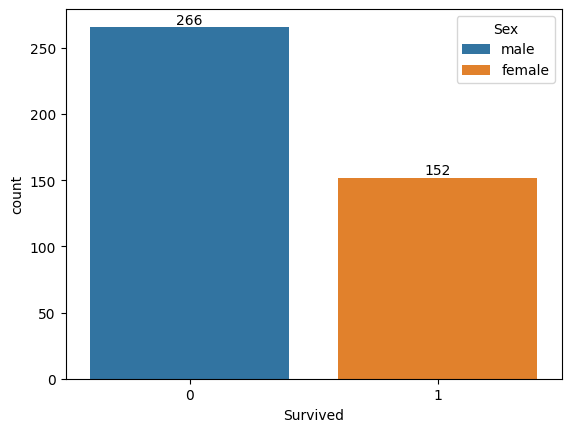

In [26]:
Chart = sns.countplot(x='Survived', hue='Sex', data=df)
for container in Chart.containers:
    Chart.bar_label(container)
plt.show()

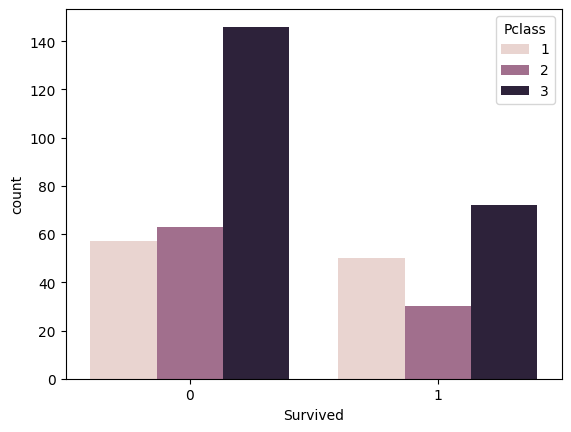

In [29]:
sns.countplot(x='Survived', hue='Pclass', data=df)
for container in Chart.containers:
    Chart.bar_label(container)
plt.show()

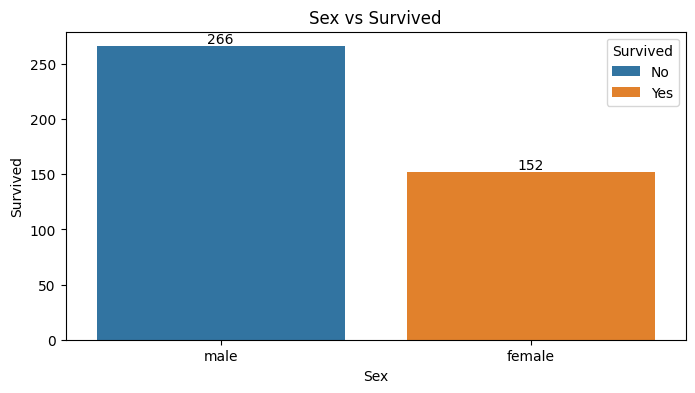

In [47]:
plt.figure(figsize=(8, 4))
Chart = sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Sex vs Survived')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.legend(title = 'Survived', labels = ['No','Yes'])

for container in Chart.containers:
    Chart.bar_label(container)
plt.show()

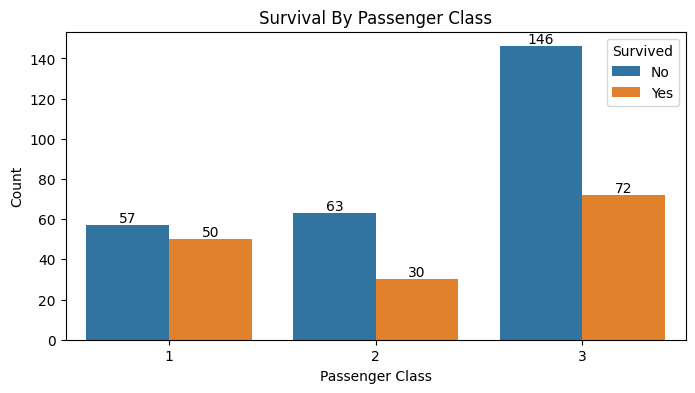

In [48]:
plt.figure(figsize=(8, 4))
Chart = sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival By Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title = 'Survived', labels = ['No','Yes'])

for container in Chart.containers:
    Chart.bar_label(container)
plt.show()

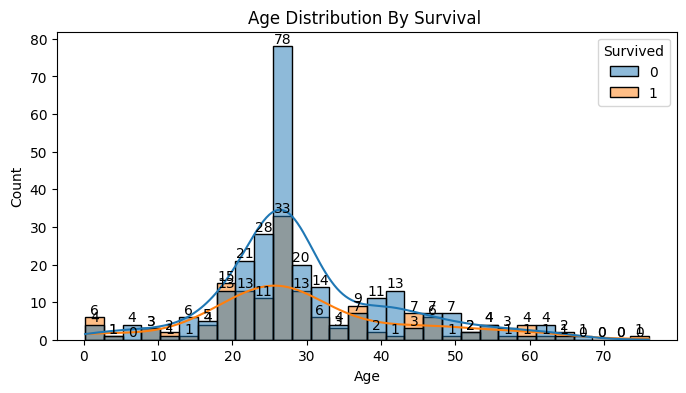

In [64]:
# Visualizes age distribution to assess survival patterns across age groups.

plt.figure(figsize=(8, 4))
Chart = sns.histplot(data=df,x='Age', hue='Survived', bins=30,kde=True)
plt.title('Age Distribution By Survival ')
plt.xlabel('Age')
plt.ylabel('Count')


for container in Chart.containers:
    Chart.bar_label(container)
plt.show()

Final Conclusion

The exploratory data analysis revealed that survival on the Titanic was strongly influenced by gender, passenger class, age, and fare. Female passengers, first-class travelers, and younger individuals had higher survival rates. These insights highlight the importance of demographic and socioeconomic factors in survival outcomes.